# Projekt zaliczeniowy 
Grupa:
Natalia Walczak 209002
Wojciech Jurek 208911
Damian Matławski 208941

Opis projektu wraz z datasetem pochodzi z: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

# Deszcz w Australii

Zbiór danych z których korzystamy zawiera obserwacje pogodowe zebrane z kilku stacji meteorologicznych rozsianych w całej Australii. Posiadamy takie dane o temperaturze, wietrze, ciśneniu, poziomie zachmurzenia czy też o tym czy w danym dniu padało. Więcej o danych i ich znaczeniu przedstawiono w tabeli poniżej:

<table class="tg">
  <tr>
    <th class="tg-96f8">Data</th>
    <th class="tg-0lax">Location</th>
    <th class="tg-m9r4">MinTemp</th>
    <th class="tg-m9r4">MaxTemp<br></th>
    <th class="tg-0lax">Rainfall</th>
    <th class="tg-0lax">Evaporation</th>
    <th class="tg-0lax">Sunshine</th>
    <th class="tg-0lax">WindGustDir</th>
    <th class="tg-0lax">WindGustSpeed</th>
  </tr>
  <tr>
    <td class="tg-0lax">data rejestracji<br>zdarzenia</td>
    <td class="tg-0lax">miejsce <br>rejestracji</td>
    <td class="tg-0lax">minimalna tempertura<br>w ciagu dnia</td>
    <td class="tg-0lax">maksymalna temperatura<br>w ciagu dnia</td>
    <td class="tg-0lax">Opady zerejestrowane<br>w ciągu dnia w mm</td>
    <td class="tg-0lax">odparowana woda<br>w mm</td>
    <td class="tg-0lax">Ilość godzin <br>słonecznego poranka<br>w ciągu dnia</td>
    <td class="tg-0lax">Kierunek najsilniejszego<br>porywu wiatru</td>
    <td class="tg-0lax">prędkość najsilniejszego<br>porywu wiatru</td>
  </tr>
</table>

<table class="tg">
  <tr>
    <th class="tg-ksfr">WindDir9am</th>
    <th class="tg-0pky">WindDir3pm</th>
    <th class="tg-ncd7">WindSpeed9am</th>
    <th class="tg-ncd7">WindSpeed3pm<br></th>
    <th class="tg-0pky">Humidity9am</th>
    <th class="tg-0pky">Pressure9am</th>
    <th class="tg-0pky">Pressure6pm</th>
    <th class="tg-0pky">Cloud9am</th>
    <th class="tg-0pky">Cloud3pm</th>
  </tr>
  <tr>
    <td class="tg-0pky">kierunek wiatru <br>o 9 rano</td>
    <td class="tg-0pky">kierunek wiatru<br>o 3 po południu</td>
    <td class="tg-0pky">prędkość wiatru<br>o 9 rano</td>
    <td class="tg-0pky">prędkość wiatru<br>o 3 po południu</td>
    <td class="tg-0pky">Wilgotność o <br>9 rano</td>
    <td class="tg-0pky">Ciśnienie o <br>9 rano w hpa</td>
    <td class="tg-0pky">Ciśnienie o <br>6 po południu w hpa</td>
    <td class="tg-0pky">Jaka część nieba<br>była zasłonięta przez <br>chmury o 9 rano</td>
    <td class="tg-0pky">Jaka część nieba<br>była zasłonięta przez <br>chmury 0 3 po południu</td>
  </tr>
</table>

<table class="tg">
  <tr>
    <th class="tg-ksfr">Temp9am</th>
    <th class="tg-0pky">Temp3pm</th>
    <th class="tg-ncd7">RISK_MM</th>
    <th class="tg-ncd7">RainTomorrow<br></th>
  </tr>
  <tr>
    <td class="tg-0pky">Temperatura o<br>9 rano w C</td>
    <td class="tg-0pky">Temperatura o<br>3 po południu w C</td>
    <td class="tg-0pky">Ilość deszczu który<br>spadł dnia następnego w mm<br>Wykorzystywany do generowania<br>odpowiedzi w następnej kolumnie</td>
    <td class="tg-0pky">To czy następnego<br>dnia padało. W formie<br>odpowiedzi Tak i Nie.<br><span style="font-weight:bold">To chcemy przewidywać</span></td>
  </tr>
</table>

### To co chcemy przewidywać to fakt czy następnego dnia będzie padać. 

Link do konkursu: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import warnings

warnings.filterwarnings('ignore')# Sprawia że nie pokazują się ostrzeżenia 

## odczytujemy plik test.csv
test = pd.read_csv("./weatherAUS.csv",skipfooter=100000)#pomijamy 100000 rekordów tak by pracować z mniejsza ilsocia danych
doheatmap = pd.read_csv("./weatherAUS.csv",skipfooter=100000)#importujemy raz jeszcze, bedzie to potrzebne do heatmap



In [2]:
liczba = test.count().sort_values(ascending=True) # zlicza tylko i wyłącznie wartości nie NaN
length=len(liczba)
for i in range(length):
    liczba[i]=(42193-liczba[i])/test.shape[0]*100 # liczymy w jakim procencie brakuje nam danych w danej kolumnie 

print("wyniki w % ")
print()
print(liczba.sort_values())


# Sprawdzamy w jakim procencie danych w danej kolumnie pojawiają się wartości NaN

wyniki w % 

RainTomorrow      0
Location          0
Date              0
MaxTemp           0
Temp9am           0
MinTemp           0
RISK_MM           0
Humidity9am       1
RainToday         1
Rainfall          1
WindSpeed9am      1
Temp3pm           2
Humidity3pm       2
WindSpeed3pm      3
WindDir3pm        4
WindDir9am       10
WindGustSpeed    11
WindGustDir      11
Pressure3pm      15
Pressure9am      15
Cloud9am         39
Cloud3pm         39
Evaporation      48
Sunshine         59
dtype: int64


## Dla kolumn Sunshine,Evaporation,Vloud3pm i Cloud 9am mamy zdecydowanie zbyt dużo braków wartości, oznacza to że kolumny te nie będą użyteczne. Dodatkowo zbędne dla nas są data i miejscowość - ponieważ pytanie brzmi czy w całej Australii będzie padać. Dodatkowo kolumna RISK_MM jest tylko kolumną pomocnicza dla "RainTomorrow" więc też nie jest nam potrzebna

In [3]:
# usuwanie kolumn
test = test.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],axis=1)
test.shape # sprawdzamy ile mamy kolumn

(42193, 17)

### W kolumnie RainTomorrow i RainToday posiadamy dane typu string, nie mogą one zostać więc zinterpretowane przez algorytm uczący. Nalezy więc zamienić je na wartości binarne

In [4]:
#usuwamy jakiekolwiek wartości NaN
test = test.dropna(how='any')
test.shape

#zamieniami Yes na 1 i No na 0 w kolumnie RainTomorrow
slownik = {'Yes': 1,'No': 0}
test.RainTomorrow = [slownik[item] for item in test.RainTomorrow]
slownik2 = {'Yes': 1,'No': 0}
test.RainToday = [slownik2[item] for item in test.RainToday]

## Wykreślmy sobie graf przedstawiający ile razy padało i nie padało, dla dnia disiejszego i jutrzejszego

0    24299
1     7042
Name: RainTomorrow, dtype: int64

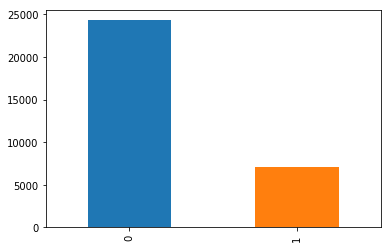

In [5]:
pd.value_counts(test['RainTomorrow']).plot.bar()
pd.value_counts(test['RainTomorrow'])

0    24106
1     7235
Name: RainToday, dtype: int64

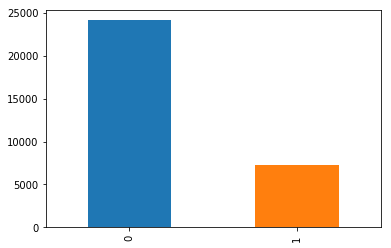

In [6]:
pd.value_counts(test['RainToday']).plot.bar()
pd.value_counts(test['RainToday'])

## Wygląda na to że dane te pokrywają się bądź są ze sobą silnie związane

# Sprawdźmy teraz statystykę naszego zestawu danych 

In [7]:
 test.describe(include=['object']) # pokazuje statystyki tylko dla danych typu "object"

,WindGustDir,WindDir9am,WindDir3pm
count,31341,31341,31341
unique,16,16,16
top,S,SW,NE
freq,2504,2479,2884


## Tutaj możemy zobaczyć statystykę dotyczącą jedynie weirszy gdy na następny dzień padało

In [8]:
print(test.loc[test['RainTomorrow'] == 1].describe()) #statystyki danych liczbowych

           MinTemp      MaxTemp     Rainfall  WindGustSpeed  WindSpeed9am  \
count  7042.000000  7042.000000  7042.000000    7042.000000   7042.000000   
mean     14.961630    22.277521     7.024183      45.316103     16.624254   
std       4.986578     5.657657    15.105104      15.245780      9.105419   
min      -4.700000     6.800000     0.000000       7.000000      2.000000   
25%      11.600000    18.400000     0.000000      35.000000      9.000000   
50%      15.600000    21.800000     0.600000      44.000000     15.000000   
75%      18.900000    25.600000     7.200000      54.000000     22.000000   
max      28.100000    46.400000   225.000000     135.000000     87.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   7042.000000  7042.000000  7042.000000  7042.000000  7042.000000   
mean      20.485941    77.862113    70.020591  1016.692559  1014.492019   
std        9.589317    14.824462    18.439482     6.811717     6.989052   
min   

In [9]:
print(test.WindGustDir.loc[test['RainTomorrow'] == 1].value_counts())#statystyka danych w kolumnie WindGustDir

S      850
SSW    687
SSE    575
NNE    511
NE     454
SE     441
ENE    440
E      426
SW     405
W      397
ESE    373
WSW    372
WNW    357
N      324
NW     236
NNW    194
Name: WindGustDir, dtype: int64


In [10]:
print(test.WindDir3pm.loc[test['RainTomorrow'] == 1].value_counts())#statystyka danych w kolumnie WindDir3pm

S      746
SSW    619
SSE    572
NE     568
SE     546
E      502
ESE    479
ENE    450
NNE    443
N      409
SW     325
WNW    316
W      291
WSW    270
NW     267
NNW    239
Name: WindDir3pm, dtype: int64


In [11]:
print(test.WindDir9am.loc[test['RainTomorrow'] == 1].value_counts())#statystyka danych w kolumnie WindDir9am

SW     664
SSW    597
NNE    505
WSW    475
W      455
E      455
N      445
NE     439
WNW    427
ENE    415
NW     406
S      397
SE     352
SSE    338
ESE    338
NNW    334
Name: WindDir9am, dtype: int64


In [12]:
print(test.WindDir9am.unique())
print(sum(pd.value_counts(test.WindDir9am.unique())),' różmych wartości')#pokazuje jakie i ile unikatowych wartosci 
                                                                         # posiada kolumna WindDir9am  

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
16  różmych wartości


In [13]:
print(test.WindDir3pm.unique())
print(sum(pd.value_counts(test.WindDir3pm.unique())),' różmych wartości')#pokazuje jakie i ile unikatowych wartosci 
                                                                         # posiada kolumna WindDir3pm 

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
16  różmych wartości


In [14]:
print(test.WindGustDir.unique())
print(sum(pd.value_counts(test.WindGustDir.unique())),' różmych wartości')#pokazuje jakie i ile unikatowych wartosci 
                                                                         # posiada kolumna WindGustDir  

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
16  różmych wartości


## W danych posiadamy trzy kolumny które posiadają 16 różnych wartości typu "object". Nasz algorytm nie będzie potrafił zinterpretować obiektów, dlatego też musimy utworzyć "dummies" (kolumny z wartosciami tych kolumn, oznaczane 1 lub 0 jesli dany wierz posiada te wartosc) tych kolumn


In [15]:
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
test = pd.get_dummies(test, columns=categorical_columns)# tworzenie dummies dla kolumn z categorical_columns

In [16]:
test.shape#sprawdzenie

(31341, 62)

In [17]:
test.columns#sprawdzenie

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'W

### Teraz standaryzujemy nasze dane. Chodzi o to żeby wsyzstkie wartości jakie mamy w tabeli mieściły się w przedziale <0,1> Do tego celu wykorzystujemy gotową funckje scaler.fit()

In [18]:
# skaluje wartości tak by mieściły się  wgranicach <0,1>

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(test)
test = pd.DataFrame(scaler.transform(test), index=test.index, columns=test.columns)

## Do oceny jakie kolumny mogą okazać się istotne podczas nauki naszego algorytmu można wykorzystać funkcje SelectKBest(). Na zasadzie testów statystycznych zwraca nam wybraną ilość kolumn najlepiej nadających się do uczenia maszyny.

In [19]:

# ocenia które kolumny najlepiej wziąść do uczenia algorytmu
from sklearn.feature_selection import SelectKBest, chi2
X = test.loc[:,test.columns!='RainTomorrow']
y = test[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)## k to ilosc zwracanych kolumn (max 3)


selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


In [27]:
#Wybieramy interesujące nas cechy i przypisujemy do X
#test = test[['Humidity3pm','Rainfall','RainToday','RainTomorrow']]

X = test.loc[:,test.columns!='RainTomorrow']  #---> wszystkie dane oprocz tych najlepszych -> daja nieco lepsze wyniki
#X = test[['Humidity3pm','Rainfall','RainToday','WindGustDir_S']] #--> dostajemy nieco gorsze wyniki
y = test[['RainTomorrow']]

In [48]:
#Rozwiązanie przy użyciu metody Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train,y_train)
y_pred = clf_logreg.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8446911689637571
Time taken : 0.4362626075744629


In [29]:
#Rozwiązanie przy użyciu metody Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8415007656967841
Time taken : 0.692190408706665


In [41]:
#Rozwiązanie przy użyciu metody Decision Tree (non-parametric supervised learning method)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.7803726391015824
Time taken : 0.6547346115112305


In [40]:
#Rozwiązanie przy użyciu metody Support Vector Machine
from sklearn import svm
from sklearn.model_selection import train_test_split

t0=time.time()# pobranie aktualnego czasu do zmiennej t0
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_svc = svm.SVC()
clf_svc.fit(X_train,y_train)
y_pred = clf_svc.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)#sprawdzenie ile czasu zajal proces uczenia

Accuracy : 0.8472434915773354
Time taken : 71.22508335113525


### Wszystkie metody dają skuteczność w zakresie 78% - 85%. Największą skuteczność osiągnęliśmy przy użyciu metody 'Support Vector Machine', lecz skuteczość okupiona jest najdłuższym czasem kompilacji w porównaniu do pozostałych metod. Bardzo podobny wynik otzrymujemy dla metod 'LogisticRegression' oraz 'Random Forest' z tym że są one około 70 razy szybsze niż 'Support Vector Machine'. Dla bardzo duzych ilości danych czas może okazać się decyujący. Najgorszą metodą okazała się metoda 'Decision Tree'.